# Lab 1: MNIST

Overview

## Get data

The first step is to download the dataset from the sklearn collection.

Then we are going to split the dataset into an `X` matrix with atributes, and an array `y` with labels.

In [1]:
import sklearn
assert sklearn.__version__ >= "0.20"

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
X, y = mnist['data'], mnist['target']

In [3]:
X.shape

(70000, 784)

In [4]:
y.shape

(70000,)

## Data pre-processing

We are going to take a look at the dataset.

Then we're going to make some transformations.

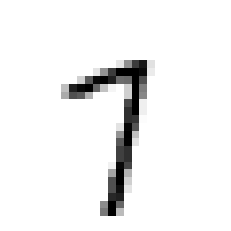

In [5]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

any_number = X.iloc[42].to_numpy()
any_number_image = any_number.reshape(28, 28)

plt.imshow(any_number_image, cmap = 'binary')
plt.axis("off")
plt.show()

In [6]:
y[42]

'7'

### Cast label string to int

In [7]:
import numpy as np
y = y.astype(np.uint8)
y[42]

7

### Split dataset

In [9]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

### Scaling inputs

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
X_test_scaled = scaler.fit_transform(X_test.astype(np.float64))

## Stochastic gradient descent learning

### Model creation

In [11]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)

### Model training (with historical data)

In [13]:
sgd_clf.fit(X_train_scaled, y_train)
sgd_clf.predict([any_number])

array([7], dtype=uint8)

### Model evaluation

In [34]:
from sklearn.metrics import accuracy_score

# Accuracy
sgd_predictions = sgd_clf.predict(X_test_scaled)

accuracy_score(y_test, sgd_predictions)

0.8971

### Cross-Validation

In [17]:
# out of the box
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_test_scaled, y_test, cv=3, scoring='accuracy')

array([0.86412717, 0.89708971, 0.89528953])

### Confusion Matrix

In [18]:
# Get predictions
from sklearn.model_selection import cross_val_predict

y_test_pred = cross_val_predict(sgd_clf, X_test_scaled, y_test, cv=3)

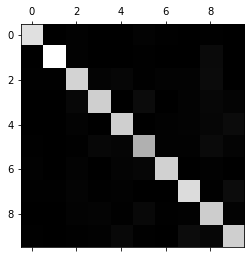

In [19]:
# Let's create a Confussion matrix
from sklearn.metrics import confusion_matrix

sgd_conf_mx = confusion_matrix(y_test, y_test_pred)
plt.matshow(sgd_conf_mx, cmap = plt.cm.gray)
plt.show()

## Logistic regression learning

### Model creation

In [22]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(random_state = 42)

### Model training (with historical data)

In [23]:
lr_clf.fit(X_train_scaled, y_train)
lr_clf.predict([any_number])

array([7], dtype=uint8)

### Model evaluation

In [35]:
# Accuracy
lr_predictions = lr_clf.predict(X_test_scaled)

accuracy_score(y_test, lr_predictions)

0.9232

### Cross-Validation

In [25]:
cross_val_score(lr_clf, X_test_scaled, y_test, cv=3, scoring='accuracy')

array([0.86172765, 0.89138914, 0.89258926])

### Confusion Matrix

In [27]:
y_test_pred_lr = cross_val_predict(lr_clf, X_test_scaled, y_test, cv=3)

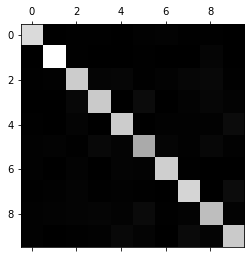

In [28]:
lr_conf_mx = confusion_matrix(y_test, y_test_pred_lr)
plt.matshow(lr_conf_mx, cmap = plt.cm.gray)
plt.show()

## Passive Aggressive Classifier learning

### Model creation

In [29]:
from sklearn.linear_model import PassiveAggressiveClassifier

pa_clf = PassiveAggressiveClassifier(random_state = 42)

### Model training (with historical data)

In [32]:
# pa_clf.fit(X_train_scaled, y_train) -> this did not work well here!
pa_clf.fit(X_train, y_train)
pa_clf.predict([any_number])

array([7], dtype=uint8)

### Model evaluation

In [37]:
# Accuracy
pa_predictions = pa_clf.predict(X_test)

accuracy_score(y_test, pa_predictions)

0.8797

### Cross-Validation

In [38]:
cross_val_score(pa_clf, X_test, y_test, cv=3, scoring='accuracy')

array([0.82633473, 0.86918692, 0.87488749])

### Confusion Matrix

In [39]:
y_test_pred_pa = cross_val_predict(pa_clf, X_test, y_test, cv=3)

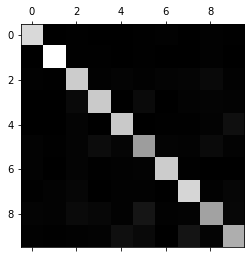

In [46]:
pa_conf_mx = confusion_matrix(y_test, y_test_pred_pa)
plt.matshow(pa_conf_mx, cmap = plt.cm.gray)
plt.show()

## Perceptron learning

### Model creation

In [41]:
from sklearn.linear_model import Perceptron

per_clf = Perceptron(random_state = 42)

### Model training (with historical data)

In [42]:
per_clf.fit(X_train_scaled, y_train)
per_clf.predict([any_number])

array([7], dtype=uint8)

### Model evaluation

In [43]:
# Accuracy
per_predictions = per_clf.predict(X_test_scaled)

accuracy_score(y_test, per_predictions)

0.8782

### Cross-Validation

In [44]:
cross_val_score(per_clf, X_test_scaled, y_test, cv=3, scoring='accuracy')

array([0.79424115, 0.8589859 , 0.85148515])

### Confusion Matrix

In [45]:
y_test_pred_per = cross_val_predict(per_clf, X_test_scaled, y_test, cv=3)

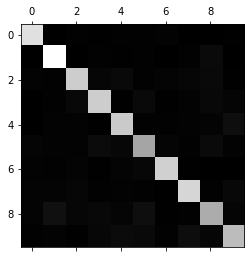

In [47]:
per_conf_mx = confusion_matrix(y_test, y_test_pred_per)
plt.matshow(per_conf_mx, cmap = plt.cm.gray)
plt.show()

## Ridge Classifier learning

### Model creation

In [48]:
from sklearn.linear_model import RidgeClassifier

rid_clf = RidgeClassifier(random_state = 42)

### Model training (with historical data)

In [49]:
rid_clf.fit(X_train_scaled, y_train)
rid_clf.predict([any_number])

array([7], dtype=uint8)

### Model evaluation

In [50]:
# Accuracy
rid_predictions = rid_clf.predict(X_test_scaled)

accuracy_score(y_test, rid_predictions)

0.8598

### Cross-Validation

In [51]:
cross_val_score(rid_clf, X_test_scaled, y_test, cv=3, scoring='accuracy')

array([0.78824235, 0.82928293, 0.83888389])

### Confusion Matrix

In [52]:
y_test_pred_rid = cross_val_predict(rid_clf, X_test_scaled, y_test, cv=3)

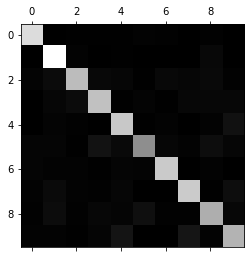

In [53]:
rid_conf_mx = confusion_matrix(y_test, y_test_pred_rid)
plt.matshow(rid_conf_mx, cmap = plt.cm.gray)
plt.show()

## Results

Results              | SGDClassifier                        | LogisticRegression                    | PassiveAggressiveClassifier           | Perceptron                            | RidgeClassifier           | 
:--------------------| :------------------------------------| :-------------------------------------| :-------------------------------------| :-------------------------------------| :-------------------------|
Accuracy             | 0.8971                               | 0.9232                                | 0.8797                                | 0.8782                                | 0.8598                                |
Cross-Validation     | 0.86412717, 0.89708971, 0.89528953   | 0.86172765, 0.89138914, 0.89258926    | 0.82633473, 0.86918692, 0.87488749    | 0.82633473, 0.86918692, 0.87488749    | 0.78824235, 0.82928293, 0.83888389    |